In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

from dqnroute import *

In [4]:
def plot_2d_embedding(X):
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1])
    
    for i, v in enumerate(X):
        ax.annotate(str(i), (v[0], v[1]))
        
def plot_graph(G, figsize=(10, 6), node_size=800, edge_label=None,
               font_color='white', save_path=None):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')
    
    degrees = [G.degree(n) for n in G.nodes]
    avg_degree = sum(degrees) / len(degrees)
    sizes = [node_size * np.log(d / avg_degree + 2) for d in degrees]
    
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx(G, pos=pos, ax=ax, with_labels=True, cmap=plt.get_cmap('viridis'),
                     node_size=sizes, font_color=font_color)
    
    if edge_label is not None:
        labels = nx.get_edge_attributes(G, edge_label)
        nx.draw_networkx_edge_labels(G, pos=pos, ax=ax, edge_labels=labels)
    
    if save_path is not None:
        fig.savefig('../img/' + save_path, bbox_inches='tight')
        
def scale_edge_weights(G, coeff):
    G2 = G.copy()
    for (u, v, ps) in G2.edges(data=True):
        G2[u][v]['weight'] = coeff * ps.get('weight', 1)
    return G2

In [5]:
np.random.seed(42)

In [6]:
A = np.random.randint(0, 2, size=(10, 10))
G = nx.from_numpy_array(A, create_using=nx.DiGraph)
G.remove_edges_from(G.selfloop_edges())

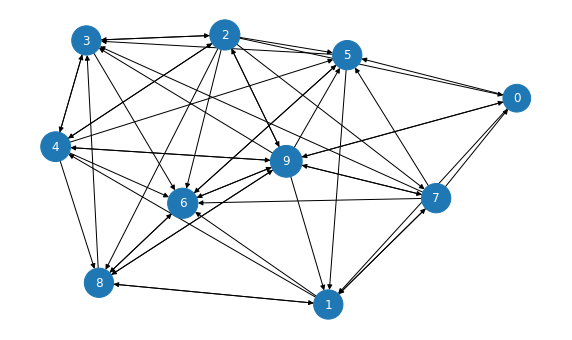

In [8]:
plot_graph(G)

In [9]:
emb = LaplacianEigenmap(dim=2)
emb.fit(G)
X = emb.transform(np.arange(10))
X

array([[-0.42086622, -0.05653481],
       [-0.09826466, -0.418906  ],
       [ 0.00987204,  0.23738205],
       [ 0.17357826,  0.28726807],
       [ 0.22522947, -0.1111076 ],
       [-0.13296616,  0.06413117],
       [ 0.12464136, -0.00818208],
       [-0.23175758,  0.14527796],
       [ 0.303235  , -0.16324499],
       [-0.02321713, -0.0446925 ]], dtype=float32)

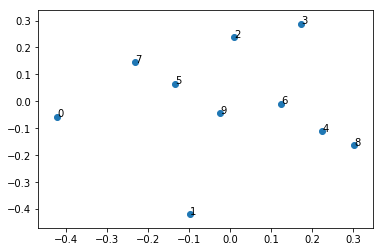

In [10]:
plot_2d_embedding(X)

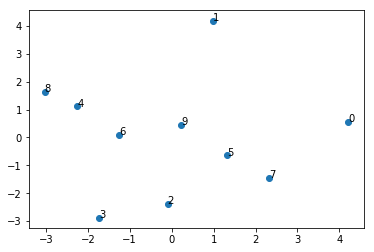

In [11]:
emb2 = LaplacianEigenmap(dim=2)
emb2.fit(scale_edge_weights(G, 10))
X2 = emb2.transform(np.arange(10))
plot_2d_embedding(X2)

In [ ]:
random_G = nx.barabasi_albert_graph(100, 3, seed=42)
for u, v in random_G.edges():
    random_G[u][v]['weight'] = np.random.randint(1, 5)

In [ ]:
plot_graph(random_G)

In [ ]:
emb3 = LaplacianEigenmap(dim=8)

In [ ]:
%%time
emb3.fit(random_G)

In [ ]:
gen_params = {
    'type': 'barabasi-albert',
    'n': 40,
    'm': 3,
    'seed': 42,
    'min-latency': 10,
    'max-latency': 20,
}
random_G2 = gen_network_graph(gen_params)
plot_graph(random_G2.to_undirected(), node_size=500, save_path='random-graph-40n.pdf')

In [ ]:
nx.multi_source_dijkstra(random_G2, [0, 5, 1], 11)

In [ ]:
gen_params_2 = {
    'type': 'barabasi-albert',
    'n': 10,
    'm': 2,
    'seed': 42,
    'min-latency': 10,
    'max-latency': 20,
}
random_small = gen_network_graph(gen_params_2)
plot_graph(random_small.to_undirected(), edge_label='latency', save_path='random-graph-10n.pdf')

In [ ]:
import yaml

with open('../launches/conveyor_energy_test.yaml') as f:
    run_params = yaml.safe_load(f)
    
layout = run_params['configuration']
top_G = make_conveyor_topology_graph(layout)
conn_G = make_conveyor_conn_graph(layout)

In [ ]:
sinks = [n for n in top_G.nodes if n[0] == 'sink']
list(nx.edge_bfs(top_G, source=sinks, orientation='reverse'))

In [ ]:
conveyor_idx(top_G, ('junction', 2))

In [ ]:
plot_graph(top_G, edge_label='length', font_color='black', node_size=1600)

In [ ]:
plot_graph(conn_G, font_color='black', node_size=1000)

In [ ]:
plot_graph(to_conv_graph(top_G), edge_label='length', font_color='black', node_size=1600)

In [ ]:
ls = list(range(100))

In [ ]:
binary_search(ls, differs_from(100), preference='next')